In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

(450, 600, 3)
Color del pixel en la posición x= 100 | y= 100: [132 227  41]


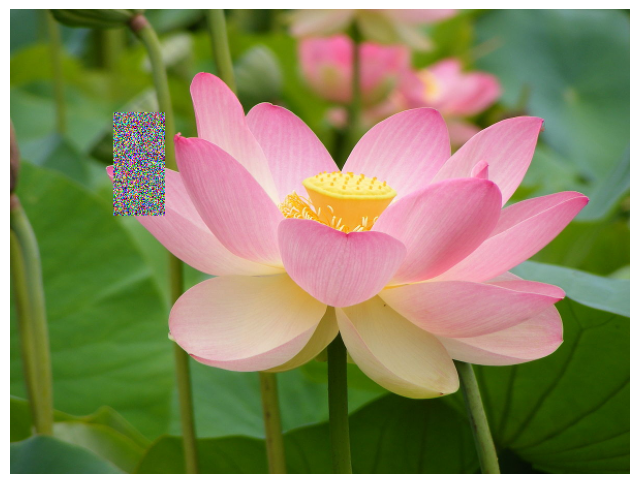

In [2]:
img = cv2.imread('images/imagen_1.jpg')
img = cv2.resize(img, None, fx = .5, fy=.5)

img[100:200, 100:150] = np.random.randint(0, 256, size=(100, 50, 3), dtype=np.uint8)

print(img.shape)

color_pixel = img[100, 100]
print(f'Color del pixel en la posición x= 100 | y= 100: {img[100, 100]}')

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


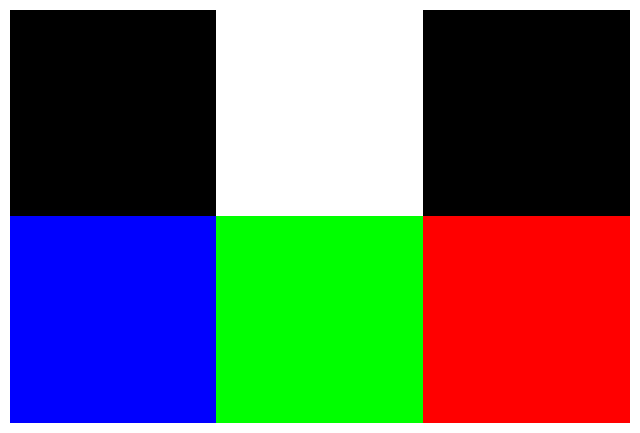

In [3]:
img_easy = np.array([
    [[0, 0, 0], [255, 255, 255], [0, 0, 0]],
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
], dtype=np.uint8)

img_resize = cv2.resize(img_easy, (300,200), interpolation = cv2.INTER_CUBIC)

cv2.imshow('Image', img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_easy)
ax.imshow(cv2.cvtColor(img_easy, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

In [4]:
from datetime import datetime

cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))
font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    ret, frame = cap.read()

    now = datetime.now()
    date_time_str = now.strftime("%Y-%m-%d %H:%M:%S")

    overlay = frame.copy()
    cv2.rectangle(frame, (width-210, height-40), (width, height), (128, 128, 128), thickness=-1)

    alpha = 0.3
    frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

    cv2.putText(frame, date_time_str, (width-200, height-15), font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

width: 640.0 | height: 480.0 | fps: 30.0


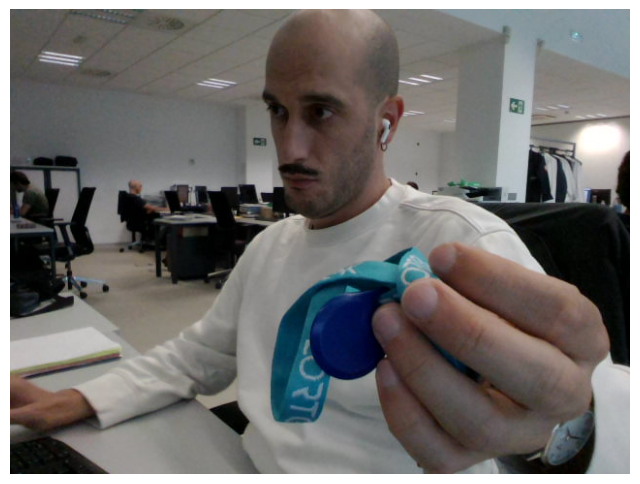

In [42]:
cap = cv2.VideoCapture(0)

ret, frame = cap.read()

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)

print(f'width: {width} | height: {height} | fps: {fps}')

cap.release()

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

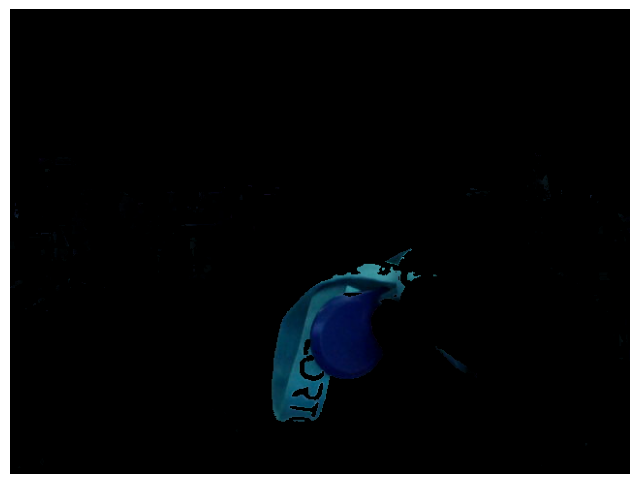

881632


In [73]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_blue = np.array([89, 150, 0])
upper_blue = np.array([140, 255, 255])

lower_green = np.array([40, 50, 50])
upper_green = np.array([80, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = mask_red1 + mask_red2

result = cv2.bitwise_and(frame, frame, mask=mask_blue)

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()
print(np.count_nonzero(result == 0))

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
25


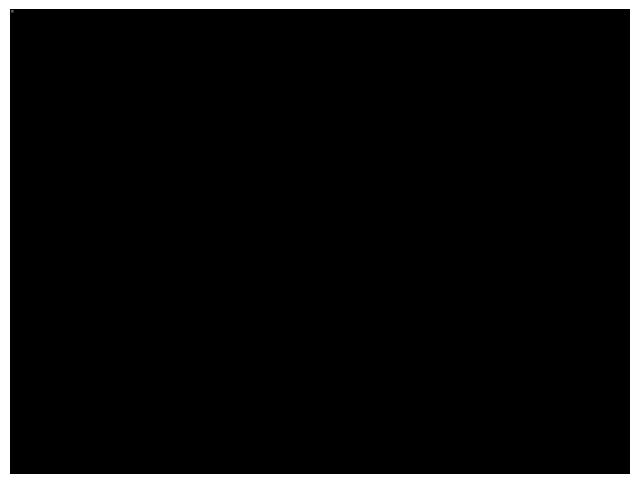

In [21]:
def create_mask(image_path, shape='circle', position=(1, 1), size=50):
    image = cv2.imread(image_path)

    # Crear una imagen en blanco (negra) del mismo tamaño que la imagen original
    mask = np.zeros(image.shape[:2], dtype="uint8")

    if shape == 'circle':
        cv2.circle(mask, position, size, 255, -1)
    elif shape == 'rectangle':
        top_left = position
        bottom_right = (position[0] + size, position[1] + size)
        cv2.rectangle(mask, top_left, bottom_right, 255, -1)

    masked_image = cv2.bitwise_and(image, image, mask=mask)

    print(mask[:10, :10])
    print(np.count_nonzero(mask == 255))

    f, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    plt.show()

    return masked_image

masked_img = create_mask('images/imagen_1.jpg', shape='rectangle', position=(2, 2), size=4)

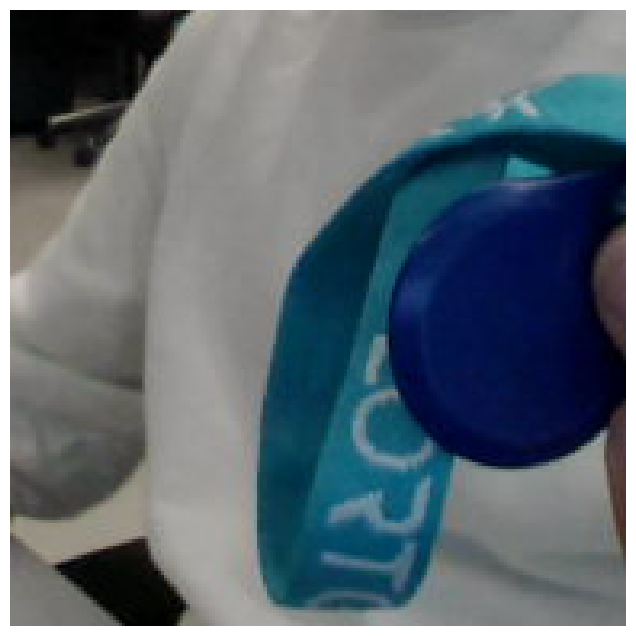

In [47]:

def crop_image_normalized(image, x_norm, y_norm):
    height, width, _ = image.shape

    x_start = int(x_norm[0] * width)
    x_end = int(x_norm[1] * width)
    y_start = int(y_norm[0] * height)
    y_end = int(y_norm[1] * height)

    return image[y_start:y_end, x_start:x_end]

cropped_image = crop_image_normalized(frame, [0.3, 0.6], [0.5, 0.9])

f, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

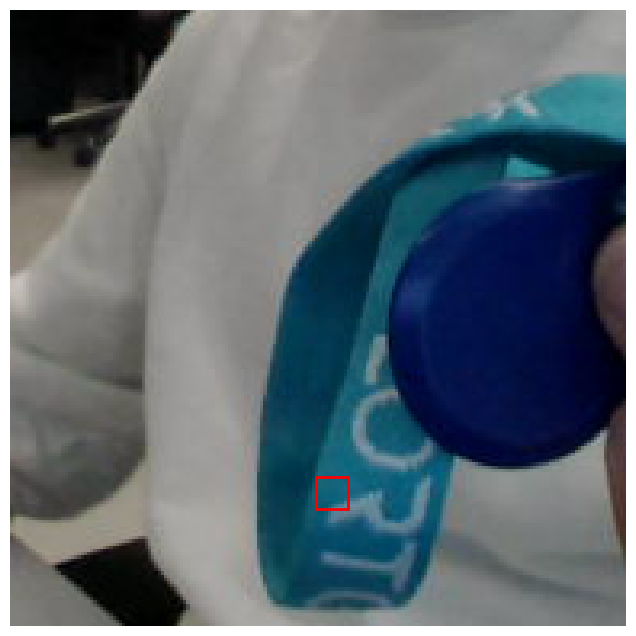

[121  97  15]
[[[ 97 223 121]]]


In [84]:
import matplotlib.patches as patches


def get_color_at(image, x, y, vis=False):
    if x < 0 or y < 0 or x >= image.shape[1] or y >= image.shape[0]:
        raise ValueError("Coordinates are out of bounds of the image.")
    
    bgr_color = image[y, x]
    if vis:
        f, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        rect = patches.Rectangle((x-5, y-5), 10, 10, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.axis('off')
        plt.show()
    return bgr_color

bgr_color = get_color_at(cropped_image, 100, 150, True)

print(bgr_color)
bgr_color = np.array([[bgr_color]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color, cv2.COLOR_BGR2HSV))


In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5)
        roi_gray = gray[y:y+w, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 5)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

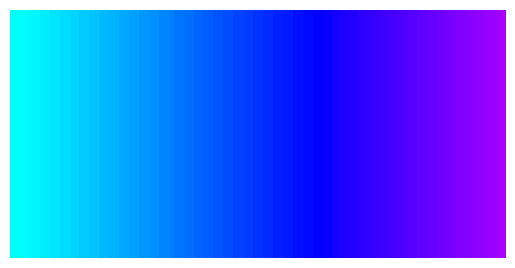

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Crear un gradiente de colores en el espectro HSV
def create_color_spectrum(lower_bound, upper_bound):
    hue_values = np.linspace(lower_bound[0], upper_bound[0], 100)  # Variación del tono (hue)
    saturation = np.full((100,), 255)  # Saturación al máximo
    value = np.full((100,), 255)  # Valor al máximo

    # Crear una imagen donde se varíe el hue y se mantenga saturación y valor constantes
    spectrum = np.zeros((50, 100, 3), dtype=np.uint8)
    for i, hue in enumerate(hue_values):
        spectrum[:, i] = [hue, saturation[i], value[i]]

    # Convertir de HSV a BGR para que sea visible
    spectrum_bgr = cv2.cvtColor(spectrum, cv2.COLOR_HSV2BGR)
    return spectrum_bgr

# Definir los rangos de azul
lower_blue = np.array([89, 150, 0])
upper_blue = np.array([140, 255, 255])

# Generar el espectro de colores entre los valores de azul definidos
spectrum = create_color_spectrum(lower_blue, upper_blue)

# Mostrar el espectro de colores usando matplotlib
plt.imshow(cv2.cvtColor(spectrum, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


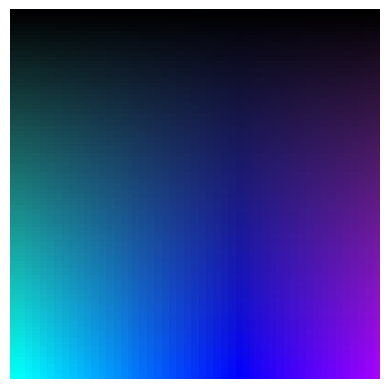

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para crear una imagen que muestra todos los colores posibles en un rango HSV
def create_full_color_spectrum(lower_bound, upper_bound):
    # Crear un lienzo para mostrar el espectro (por ejemplo, 100x100)
    height, width = 100, 100
    spectrum = np.zeros((height, width, 3), dtype=np.uint8)

    # Generar combinaciones de los tres canales (Hue, Saturation, Value)
    hue_values = np.linspace(lower_bound[0], upper_bound[0], width)
    saturation_values = np.linspace(lower_bound[1], upper_bound[1], height)
    value_values = np.linspace(lower_bound[2], upper_bound[2], height)

    # Llenar la imagen variando Saturation y Value en cada píxel
    for i, hue in enumerate(hue_values):
        for j, (saturation, value) in enumerate(zip(saturation_values, value_values)):
            spectrum[j, i] = [hue, saturation, value]

    # Convertir de HSV a BGR para que sea visible
    spectrum_bgr = cv2.cvtColor(spectrum, cv2.COLOR_HSV2BGR)
    return spectrum_bgr

# Definir los rangos de azul
lower_blue = np.array([89, 150, 0])
upper_blue = np.array([140, 255, 255])

# Generar el espectro de colores considerando los tres canales
spectrum = create_full_color_spectrum(lower_blue, upper_blue)

# Mostrar el espectro de colores usando matplotlib
plt.imshow(cv2.cvtColor(spectrum, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


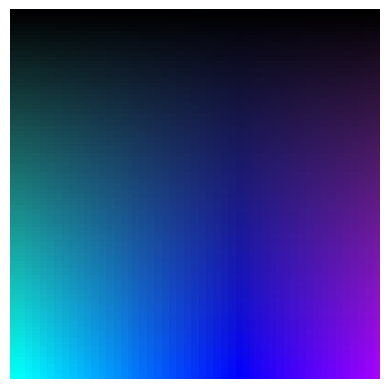

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para crear una imagen que muestra todos los colores posibles en un rango HSV
def create_full_color_spectrum(lower_bound, upper_bound):
    # Crear un lienzo para mostrar el espectro (por ejemplo, 100x100)
    height, width = 100, 100
    spectrum = np.zeros((height, width, 3), dtype=np.uint8)

    # Generar combinaciones de los tres canales (Hue, Saturation, Value)
    hue_values = np.linspace(lower_bound[0], upper_bound[0], width)
    saturation_values = np.linspace(lower_bound[1], upper_bound[1], height)
    value_values = np.linspace(lower_bound[2], upper_bound[2], height)

    # Llenar la imagen variando los tres canales
    for i in range(width):
        for j in range(height):
            hue = hue_values[i]
            saturation = saturation_values[j]
            value = value_values[j]
            spectrum[j, i] = [hue, saturation, value]

    # Convertir de HSV a BGR para que sea visible
    spectrum_bgr = cv2.cvtColor(spectrum, cv2.COLOR_HSV2BGR)
    return spectrum_bgr

# Definir los rangos de azul
lower_blue = np.array([89, 150, 0])
upper_blue = np.array([140, 255, 255])

# Generar el espectro de colores considerando los tres canales
spectrum = create_full_color_spectrum(lower_blue, upper_blue)

# Mostrar el espectro de colores usando matplotlib
plt.imshow(cv2.cvtColor(spectrum, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
